From here: http://localhost:8000/Python_Tutorials/Basics/

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import meep as mp

In [17]:
cell, geometry, sources, pml_layers, resolution = (None,) * 5
def reset_defaults():
    global cell, geometry, sources, pml_layers, resolution
    cell = mp.Vector3(16, 16, 0)

    geometry = [mp.Block(mp.Vector3(1e20, 2, 1e20),
                         center=mp.Vector3(0, 0),
                         material=mp.Medium(epsilon=12)),
               mp.Block(mp.Vector3(1, 3, 1e20),
                         center=mp.Vector3(0, 0),
                         material=mp.Medium(epsilon=3))]

    sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                         component=mp.Ez,
                         center=mp.Vector3(-7,0))]

    pml_layers = [mp.PML(1.0)]

    resolution = 10

In [18]:
reset_defaults()
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
sim.run(until=500)

-----------
Initializing structure...
run 0 finished at t = 500.0 (10000 timesteps)


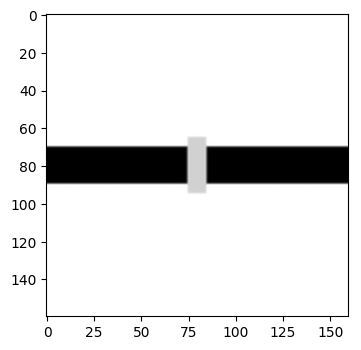

In [19]:
# Just the geometry
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure(dpi=100)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
# plt.axis('off')

(-0.5, 159.5, 159.5, -0.5)

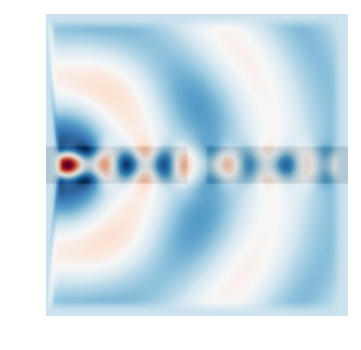

In [20]:
# Now the actual field
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure(dpi=100)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')


In [23]:
reset_defaults()
# Non-default settings here
sources = [mp.Source(mp.ContinuousSource(frequency=0.15, width=20),
                     component=mp.Ez,
                     center=mp.Vector3(-7,0.5),
                     size=mp.Vector3(0,.5))]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)

-----------
Initializing structure...
run 0 finished at t = 200.0 (4000 timesteps)
